In [1]:
from i10_bluesky.devices.rasor.detectorSlits import *
from i10_bluesky.devices.scalerCard import ScaleCard
from i10_bluesky.devices.pimteAD import *
from i10_bluesky.plans.rasor.pimte_plans import AdPlan
from ophyd_async.core import DeviceCollector 
from ophyd_async.core.detector import TriggerInfo, DetectorTrigger
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky import RunEngine
from bluesky.plans import count, scan 
from ophyd.sim import det1
from bluesky import utils
from bluesky.utils import Msg
from dodal.beamlines.beamline_utils import set_directory_provider
from ophyd_async.core._providers import StaticDirectoryProvider
import asyncio
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector():
    ds = DetectorSlits('ME01D-MO-APTR',name = "detSlits")
    #scaler = ScaleCard("ME01D-EA-SCLR-01", name = "rscaler")

In [3]:
result = loop.create_task(ds.dsd.read())


In [4]:
result.result()

{'detSlits-dsd': {'value': 26.576531250000002,
  'timestamp': 1712145909.434172,
  'alarm_severity': 0}}

In [5]:
RE(count([ds.dsd,ds.dsu]),bec)



Transient Scan ID: 1     Time: 2024-04-03 12:05:11
Persistent Unique Scan ID: 'fa7a3e7c-b6c2-4ef0-8f06-9676f279e556'
New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | detSlits-dsd | detSlits-dsu |
+-----------+------------+--------------+--------------+
|         1 | 12:05:11.8 |       26.577 |       26.091 |
+-----------+------------+--------------+--------------+
generator count ['fa7a3e7c'] (scan num: 1)





('fa7a3e7c-b6c2-4ef0-8f06-9676f279e556',)

In [3]:
df =  StaticDirectoryProvider("/dls/i10/data/2024/cm37251-2/processing/", "i10-")

In [4]:
pimte = HDFStatsPimte(
        "BL10I-EA-PIMTE-01:",
        df,
        "pimte",
    )

In [5]:
loop.create_task(pimte.connect())

<Task pending name='Task-33' coro=<Device.connect() running at /venv/lib/python3.11/site-packages/ophyd_async/core/device.py:61>>

In [6]:
result = loop.create_task(pimte.drv.acquire_time.read())

In [7]:
result.result()

{'pimte-drv-acquire_time': {'value': 0.002,
  'timestamp': 1712146384.590161,
  'alarm_severity': 0}}

In [8]:
RE(count([pimte],1,0.02),bec)



Transient Scan ID: 1     Time: 2024-04-03 12:17:32
Persistent Unique Scan ID: 'a9a91a87-9a01-4c16-a873-f330d8ee31d3'
New stream: 'primary'


/venv/lib/python3.11/site-packages/bluesky/callbacks/core.py:332: UserWarning: The key pimte will be skipped because LiveTable does not know how to display the dtype array
  warnings.warn("The key {} will be skipped because LiveTable "


+-----------+------------+
|   seq_num |       time |
+-----------+------------+
|         1 | 12:17:35.6 |
+-----------+------------+
generator count ['a9a91a87'] (scan num: 1)





('a9a91a87-9a01-4c16-a873-f330d8ee31d3',)

In [12]:
import h5py
import matplotlib.pyplot as plt

In [13]:
with h5py.File("/scratch/i10-bluesky/i10-pimte-hdf.h5","r") as f:
    data = f["entry/data/data"][0]

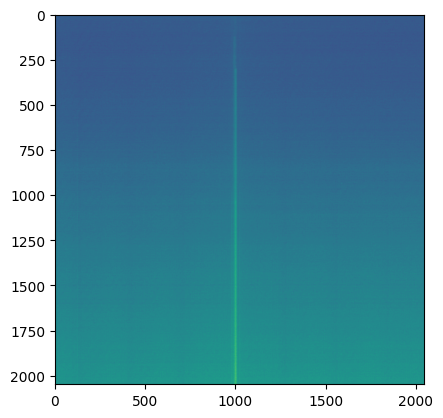

In [14]:
plt.imshow(data)

In [17]:
def takeImg(det,value):
    yield Msg('prepare', det, value)
ti = TriggerInfo(1, DetectorTrigger.internal,5,0.02)

In [18]:
RE(takeImg(pimte,ti),bec)

()

In [19]:
pimte.drv.acquire_time.read()

<coroutine object SignalR.read at 0x7fbd21172940>

In [20]:
pimtePlan = AdPlan(pimte)

In [21]:
RE(AdPlan.tiggerImg(pimtePlan,ti))

()

In [22]:
RE([pimtePlan.takeImg()])

ERROR:bluesky:Run aborted
Traceback (most recent call last):
  File "/venv/lib/python3.11/site-packages/bluesky/run_engine.py", line 1579, in _run
    msg.command, msg.obj, msg.args, msg.kwargs,
    ^^^^^^^^^^^
AttributeError: 'generator' object has no attribute 'command'


AttributeError: 'generator' object has no attribute 'command'

In [29]:
pimtePlan.takeImg

<bound method AdPlan.takeImg of <i10_bluesky.plans.rasor.pimte_plans.AdPlan object at 0x7fbd2051f110>>

In [28]:
AdPlan.tiggerImg

<function i10_bluesky.plans.rasor.pimte_plans.AdPlan.tiggerImg(det: ophyd_async.core.detector.StandardDetector, value: ophyd_async.core.detector.TriggerInfo) -> bluesky.utils.Msg>